## Day 1

Oops

```
ERROR:aocd.models:got 400 status code token=...
ERROR:aocd.models:Puzzle inputs differ by user.  Please log in to get your puzzle input.
```

That cost me a minute or two :facepalm:

No excuse though, I'd forgotten even how to convert a string to number in python (or at least, didn't recognise the error when I tried to `int()` an empty line)

```
ValueError: invalid literal for int() with base 10: ''
```

In [48]:
from aocd import data
elves = [sum([int(calories) for calories in elf.split('\n')]) for elf in data.split('\n\n')]
max(elves)

64929

In [49]:
sum(sorted(elves)[-3:])

193697

## Day 2

Started with bruteforce approach, but didn't read instructions clearly enough about the scoring.

Not convinced the cleaned up approach is actually better than just bruteforcing.

In [47]:
from aocd import lines

ROCK = 1
PAPER = 2
SCISSORS = 3
SCORES = [0, 3, 6]

def play(me, opponent):
    # result: lose = 0, draw = 1, win = 2
    result = ((me + 1 - opponent) % 3)
    return me + SCORES[result]

score = 0
for l in lines:
    opponent, me = l.split(' ')
    opponent_throw = "ABC".index(opponent) + 1
    my_throw = "XYZ".index(me) + 1
    score += play(my_throw, opponent_throw)

score

13221

In [57]:
from aocd import lines

ROCK = 1
PAPER = 2
SCISSORS = 3
SCORES = [0, 3, 6]

def play(result, opponent):
    # result: lose = 0, draw = 1, win = 2
    # always choose the throw that gives desired result
    my_throw = (opponent + result + 1) % 3 + 1
    return my_throw + SCORES[result]

score = 0
for l in lines:
    opponent, me = l.split(' ')
    opponent_throw = "ABC".index(opponent) + 1
    result = "XYZ".index(me)
    score += play(result, opponent_throw)

score

13131

## Day 3

Normally I would be at church on Saturdays, but am home sick today. Still forgot about it until 16 mins past start time =_=

Was a bit tricky that the repeated letter appears multiple times later on in the data. Typing the wrong answer in the input box cost me a 1 min penalty as well, not that it matters when I'm starting late. Should learn to use the `submit()` function in `aocd` package.

Also, I forgot about `//` operator

In [1]:
from aocd import lines

s = 0
alphabet = 'abcdefghijklmnopqrstuvwxyz'
for l in lines:
    a, b = l[:len(l)//2], l[len(l)//2:]
    for c in a:
        if c in b:
            if c in alphabet:
                s += alphabet.index(c) + 1
            else:
                s += alphabet.upper().index(c) + 27
            break
s

7597

In [30]:
from aocd import lines
s = 0
while len(lines) > 0:
    a, b, c = lines[:3]
    lines = lines[3:]
    for cc in a:
        if cc in b and cc in c:
            if cc in alphabet:
                s += alphabet.index(cc) + 1
            else:
                s += alphabet.upper().index(cc) + 27
            break
s

2607

## Day 4

This one felt like more of a speed typing competition since it's so simple.

In [15]:
from aocd import lines
import re
def get_set(line):
    a0, a1, b0, b1 = map(int, re.findall(r'\d+', line))
    return set(range(a0, a1 + 1)), set(range(b0, b1 + 1))
sum([s0.issubset(s1) or s1.issubset(s0) for s0, s1 in map(get_set, lines)])

536

In [17]:
sum([len(s0.intersection(s1)) > 0 for s0, s1 in map(get_set, lines)])

845

In [19]:
# alternative using set operators
part1 = sum([s0 <= s1 or s1 <= s0 for s0, s1 in map(get_set, lines)])
part2 = sum([any(s0 & s1) for s0, s1 in map(get_set, lines)])
part1, part2

(536, 845)

# Day 5

The input looked harder to parse than the problem itself so I ended up transcribing by hand to begin with. Was a good call.

```
stacks = [
    "BVSNTCHQ",
    "WDBG",
    ...
]
```

Pretty close to top 100, but I am really super rusty with Python :(

In [79]:
from aocd import data
from collections import defaultdict

crates, instructions = [block.split('\n') for block in data.split('\n\n')]
stacks = defaultdict(lambda: [])

while crates:
    for idx, c in enumerate(list(crates.pop())):
        if c.isalpha():
            stacks[(idx-1) // 4 + 1].append(c)
for ins in instructions:
    num, src, dst = map(int, re.findall(r'\d+', ins))
    for _ in range(num):
        crate = stacks[src].pop()
        stacks[dst].append(crate)

''.join([stacks[i+1][-1] for i in range(9)])

'FJSRQCFTN'

In [81]:
from aocd import data
from collections import defaultdict

crates, instructions = [block.split('\n') for block in data.split('\n\n')]
stacks = defaultdict(lambda: [])

while crates:
    for idx, c in enumerate(list(crates.pop())):
        if c.isalpha():
            stacks[(idx-1) // 4 + 1].append(c)
for ins in instructions:
    num, src, dst = map(int, re.findall(r'\d+', ins))
    stacks[dst] += stacks[src][-num:]
    stacks[src] = stacks[src][:-num]

''.join([stacks[i+1][-1] for i in range(9)])

'CJVLJQPHS'

## Day 6

Off-by-one error got me today :( and then, in the process of validating why my answer was wrong, I ended up submitting the wrong answer for part 2 because I had modified the code to use the test input :((

In [18]:
from aocd import get_data
d = get_data()
next(i+4 for i,_ in enumerate(d) if len(set(d[i:i+4])) == 4)

1262

In [17]:
next(i+14 for i,_ in enumerate(d) if len(set(d[i:i+14])) == 14)

3444

## Day 7

Off-by-one mistake AGAIN. This time I chose the directory that just did not free up enough space instead of the one that just frees up enough space ><

Pretty messy code, can't be bothered to clean up.

In [41]:
from aocd import lines
import re
tree = {}
cwd = []
listing = False

for l in lines:
    m = re.search(r'\$ cd (.+)', l)
    if m:
        listing = False
        path = m.group(1)
        if path == '/':
            cwd = []
        if path == '..':
            cwd.pop()
        else:
            cwd.append(path)
    m = re.search(r'\$ ls', l)
    if m:
        listing = True
    if listing:
        m = re.search('(\d+) (.+)', l)
        if m:
            size, name = m.groups()
            size = int(size)
            for parts in range(len(cwd)):
                if parts == 0:
                    ppwd = cwd[:]
                else:
                    ppwd = cwd[:-parts]
                pppwd = '/'.join(ppwd)
                try:
                    tree[pppwd] += size
                except KeyError:
                    tree[pppwd] = size

sum(filter(lambda k: k < 100000, tree.values()))

1543140

In [45]:
used = tree['/']
fs = 70000000
need = 30000000
unused = fs - used
need_to_free = need - unused
next(filter(lambda k: k >= need_to_free, sorted(tree.values())))

1117448

## Day 8

Field utility finally comes in handy again, but I needed a refresher course on how to use it effectively...

INFO:aocd.get:current day=8
INFO:aocd.get:most recent year=2022
INFO:root:Using default key_fn: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}


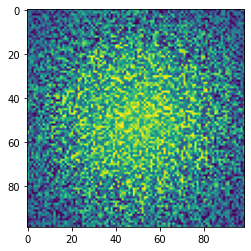

In [99]:
from aocd import get_data
f = Field(get_data()).map(int)
f.plot()

In [105]:
visible_trees = 0

for (x, y), my_height in f.iterate():
    visible = False
    for d in range(4):
        m = Marker((x, y), d)
        m.move()
        obscured = False
        while m.is_inside(f):
            h = f.get(*m.pos)
            if h >= my_height:
                obscured = True
                break
            m.move()
        if not obscured:
            visible = True
            break
    if visible:
        visible_trees += 1

visible_trees

1560

In [104]:
scores = []

for (x, y), my_height in f.iterate():
    score = 1
    for d in range(4):
        m = Marker((x, y), d)
        m.move()
        trees_seen = 0
        while m.is_inside(f):
            h = f.get(*m.pos)
            trees_seen += 1
            if h >= my_height:
                break
            m.move()
        score *= trees_seen
    scores.append(score)
max(scores)

252000

## Day 9

Did this during Little Victories, which made it hard to focus. I didn't implement the `drag()` method properly to handle diagonal movement which worked for part 1 but screwed me over for part 2.

6236
CPU times: user 264 ms, sys: 2.19 ms, total: 266 ms
Wall time: 265 ms


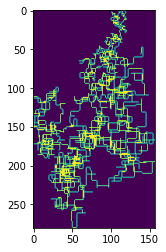

In [302]:
%%time
from aocd import lines
import math

head = Marker((0, 0))
tail = Marker((0, 0))
positions = set()
positions.add(tail.pos)

def drag(h, t):
    # t only moves if it is 2 squares away from h in either direction
    dx, dy = h.diff(t)
    if abs(dx) == 2 or abs(dy) == 2:
        # when t moves, it moves 1 square towards h in both directions
        dx, dy = np.clip([dx, dy], -1, 1)
        t.pos = (t.pos[0] + dx, t.pos[1] + dy)
    
for l in lines:
    d, n = l.split(' ')
    for _ in range(int(n)):
        head.move(Direction.from_string(d), 1)
        drag(head, tail)
        positions.add(tail.pos)
        
print(len(positions))
plot_xy_list(positions)

2449
CPU times: user 1.08 s, sys: 3.43 ms, total: 1.08 s
Wall time: 1.08 s


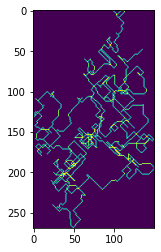

In [303]:
%%time
knots = [Marker((0, 0)) for _ in range(10)]
positions = set()
positions.add(knots[9].pos)

for l in lines:
    d, n = l.split(' ')
    for _ in range(int(n)):
        knots[0].move(Direction.from_string(d), 1)
        for i, k in enumerate(knots):
            if i == 9:
                positions.add(k.pos)
            else:
                drag(k, knots[i + 1])
print(len(positions))
plot_xy_list(positions)

## Day 10

Had a carols event, so wasn't competitive. It also took me a LONG time to understand part 2, though my plotting utility functions definitely helped. Took 20 mins from actual start time.

In [373]:
from aocd import lines
x = 1
cycle = [1]
for l in lines:
    if l == 'noop':
        cycle.append(x)
    else:
        _, num = l.split(' ')
        num = int(num)
        cycle.append(x)
        x += num
        cycle.append(x)
sum([cycle[i-1] * i for i in [20, 60, 100, 140, 180, 220]])        

17180

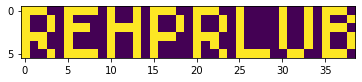

In [374]:
width = 40
pixels = []
for i, sprite_pos in enumerate(cycle):
    x = i % width
    y = i // width
    if -1 <= x - sprite_pos <= 1:
        pixels.append((x, y))
plot_xy_list(pixels)

## Day 11

I do so hate these math theory problems. I knew it had something to do with modulo the result but took me too long to realise I can't just store the number that would help me figure out the next result but for all future results, so I needed to modulo by the product of all divisors.

In [461]:
%%time

import re
from aocd import get_data

class Monkey(object):
    def __init__(self, lines):
        self.inspected = 0
        for l in lines:
            m = re.match('Monkey (\d+)', l)
            if m:
                self.id = m.group(1)
            m = re.search('Operation: new = (.+)$', l)
            if m:
                self.op = m.group(1)
            m = re.search('Starting items: (.+)$', l)
            if m:
                self.items = list(map(int, m.group(1).split(', ')))
            m = re.search('divisible by (\d+)', l)
            if m:
                self.div = int(m.group(1))
            m = re.search('If true: throw to monkey (\d+)', l)
            if m:
                self.throw_true = int(m.group(1))
            m = re.search('If false: throw to monkey (\d+)', l)
            if m:
                self.throw_false = int(m.group(1))
    def inspect(self, part2=False):
        while self.items:
            old = self.items.pop()
            self.inspected += 1
            new = eval(self.op)
            if not part2:
                new //= 3
            else:
                new %= all_divs
            if new % self.div == 0:
                dest = monkeys[self.throw_true]
            else:
                dest = monkeys[self.throw_false]    
            dest.items.append(new)
            
monkeys = []
for m in get_data(day=11).split('\n\n'):
    monkeys.append(Monkey(m.split('\n')))

all_divs = np.prod([m.div for m in monkeys])

for _ in range(20):
    for m in monkeys:
        m.inspect()
        
print(np.prod(sorted([m.inspected for m in monkeys])[-2:]))

monkeys = []
for m in get_data(day=11).split('\n\n'):
    monkeys.append(Monkey(m.split('\n')))
                
for _ in range(10000):
    for m in monkeys:
        m.inspect(True)
    
print(np.prod(sorted([m.inspected for m in monkeys])[-2:]))

INFO:aocd.get:most recent year=2022
INFO:aocd.get:most recent year=2022


120756
39109444654
CPU times: user 8.31 s, sys: 15.6 ms, total: 8.33 s
Wall time: 8.34 s


## Day 12

Fiasco of thinking I should use my handwritten dijkstra algorithm when I could've just used `networkx`.

INFO:aocd.get:current day=12
INFO:aocd.get:most recent year=2022
INFO:root:Using default key_fn: {'E': 0, 'S': 1, 'a': 2, 'b': 3, 'c': 4, 'd': 5, 'e': 6, 'f': 7, 'g': 8, 'h': 9, 'i': 10, 'j': 11, 'k': 12, 'l': 13, 'm': 14, 'n': 15, 'o': 16, 'p': 17, 'q': 18, 'r': 19, 's': 20, 't': 21, 'u': 22, 'v': 23, 'w': 24, 'x': 25, 'y': 26, 'z': 27}


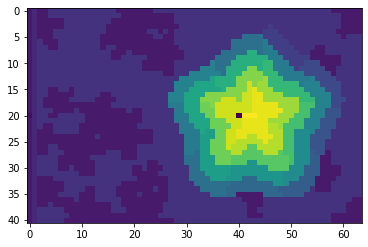

In [550]:
from aocd import lines
import networkx as nx

f = Field(get_data())
f.plot()

def get_height(t):
    if t == 'S':
        return ord('a')
    if t == 'E':
        return ord('z')
    return ord(t)

G = nx.DiGraph()
for pos, t in f.iterate():
    # add any edge we can climb
    for adj_pos in Marker(pos).adjacent():
        try:
            at = f.get(*adj_pos)
            if get_height(at) - get_height(t) <= 1:
                G.add_edge(pos, adj_pos)
        except KeyError: # adjacent() can return OOB points
            pass

In [558]:
start = next(f.find('S'))
goal = next(f.find('E'))

nx.shortest_path_length(G, start, goal)

370

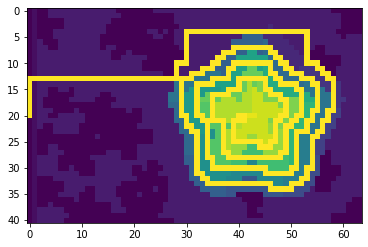

In [574]:
# plotting practice
f2 = f.clone()
for p in nx.shortest_path(G, start, goal):
    f2.set(*p, '{')
f2.plot(key_fn=lambda t: ord(t) - ord('a'))

In [559]:
# not all starts have solutions
def get_solution(start):
    try:
        return nx.shortest_path_length(G, start, goal)
    except:
        return math.inf

# technically need to check 'S' as well, but can just eyeball compare the part 1 result    
min([get_solution(s) for s in f.find('a')]) 

363

## Day 13

Ugh why did python3 remove the `cmp` function to `sorted` :(

Should learn to use `zip` properly

In [641]:
# basically just transcribe the english into code
def cmp(l, r):
    if isinstance(l, int) and isinstance(r, int):
        return l - r
    if isinstance(l, list) and isinstance(r, list):
        # could use zip() here
        lcopy = l[:]
        rcopy = r[:]
        while True:
            if len(lcopy) == 0 and len(rcopy) == 0:
                return 0
            if len(lcopy) == 0:
                return -1
            if len(rcopy) == 0:
                return 1
            ll = lcopy.pop(0)
            rr = rcopy.pop(0)
            # could use := assignment here
            cc = compare(ll, rr)
            if cc != 0:
                return cc
        return 0
    if isinstance(l, list):
        return compare(l, [r])
    return compare([l], r)

In [642]:
# part 1
blocks = get_data(day=13).split('\n\n')
s = 0
for i, block in enumerate(blocks):
    a, b = map(eval, block.split('\n'))
    if cmp(a, b) < 0:
        s += i + 1
s

INFO:aocd.get:most recent year=2022


5580

In [643]:
# part 2
import functools
import math
dividers = [[[2]], [[6]]]
packets = [eval(l) for l in get_data(day=13).split('\n') if l != '']
packets.extend(dividers)
s = sorted(packets, key=functools.cmp_to_key(cmp))
math.prod([s.index(d) + 1 for d in dividers])

INFO:aocd.get:most recent year=2022


26200

## Day 14

Today I overcompensated for my constant off-by-one errors so it resulted in me `-1` when there was no need to.

I also had a bug where I didn't add the first coordinate into the blocks when looping from one point to another, in fact I was lucky my original solution actually worked, even with the bug still semi-present.

1072

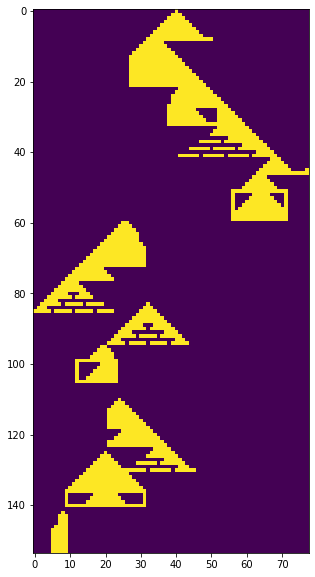

In [766]:
from aocd import lines

blocks = set()
sand = set()

for l in lines:
    coords = l.split(' -> ')
    for i, coord in enumerate(coords):
        if i > 0:
            x0, y0 = map(int, coords[i - 1].split(','))
            x1, y1 = map(int, coord.split(','))
            minx, maxx = min(x0, x1), max(x0, x1)
            miny, maxy = min(y0, y1), max(y0, y1)
            for x in range(minx, maxx + 1):
                for y in range(miny, maxy + 1):
                    blocks.add((x, y))
        
origin = (500, 0)
abyss = max([b[1] for b in blocks]) + 1

def is_blocked(pos):
    return pos in blocks or pos in sand

def drop_sand():
    m = Marker(origin)
    while True:
        if not is_blocked(m.relative_pos(Direction.S)):
            m.move(Direction.S)
        elif not is_blocked(m.relative_pos(Direction.SW)):
            m.move(Direction.SW)
        elif not is_blocked(m.relative_pos(Direction.SE)):
            m.move(Direction.SE)
        else:
            sand.add(m.pos)
            return True
        if m.pos[1] > abyss:
            return False
        
while drop_sand():
    pass

plt.figure(figsize = (10,10))
plot_xy_list(blocks.union(sand))
len(sand)

24659

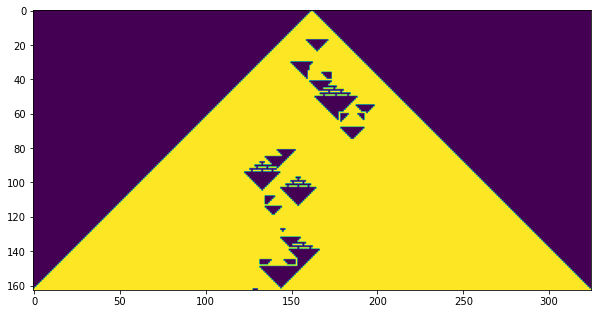

In [768]:
from aocd import lines

blocks = set()
sand = set()

for l in lines:
    coords = l.split(' -> ')
    for i, coord in enumerate(coords):
        if i > 0:
            x0, y0 = map(int, coords[i - 1].split(','))
            x1, y1 = map(int, coord.split(','))
            minx, maxx = min(x0, x1), max(x0, x1)
            miny, maxy = min(y0, y1), max(y0, y1)
            for x in range(minx, maxx + 1):
                for y in range(miny, maxy + 1):
                    blocks.add((x, y))
        
origin = (500, 0)
floor = max([b[1] for b in blocks]) + 2

def is_blocked(pos):
    return pos in blocks or pos in sand or pos[1] == floor

def drop_sand():
    m = Marker(origin)
    while True:
        if not is_blocked(m.relative_pos(Direction.S)):
            m.move(Direction.S)
        elif not is_blocked(m.relative_pos(Direction.SW)):
            m.move(Direction.SW)
        elif not is_blocked(m.relative_pos(Direction.SE)):
            m.move(Direction.SE)
        else:
            sand.add(m.pos)
            return m.pos != origin
        
while drop_sand():
    pass

plt.figure(figsize = (10,10))
plot_xy_list(blocks.union(sand))
len(sand)

## Day 15

I had a meeting at 4-5 today :(

And then, I took a very long time to realise I was ignoring negative numbers with my `re.findall(r'\d+')`. It's tricky that the test data didn't have negative numbers :(

I was totally stumped for part 2 for the longest time, I couldn't come up with a smart way to reduce the search space. In the end I assumed that the point we needed to find must be 1 outside the range of a sensor and iterated through the "just out-of-range" coords for a point that satisfies all other sensors. Not efficient, but worked. I ought to learn how to use `z3`, but even trying to install that wasted me a good 10 minutes because there is some other package called `z3` already??

In [41]:
def man_dist(p0, p1):
    return abs(p0[0]-p1[0]) + abs(p0[1]-p1[1])

In [43]:
%%time
import re
from aocd import lines
yy = 2000000

excluded = set()
for l in lines:
    x0, y0, x1, y1 = map(int, re.findall(r'-?\d+', l))
    dist_to_beacon = man_dist((x0, y0), (x1, y1))    
    dist_to_yy = abs(yy - y0)
    if dist_to_yy >= dist_to_beacon:
        continue
    remaining_dist = dist_to_beacon - dist_to_yy
    for xx in range(x0 - remaining_dist, x0 + remaining_dist + 1):
        if (xx, yy) != (x1, y1):
            excluded.add(xx)

len(excluded)

CPU times: user 2.46 s, sys: 84.5 ms, total: 2.55 s
Wall time: 2.55 s


5142231

In [45]:
%%time
from aocd import lines

sensors = []
limit = 4000000

class Sensor(object):
    def __init__(self, sensor, beacon):
        self.sensor = sensor
        self.beacon = beacon
        self.dist = man_dist(sensor, beacon)
    def is_invalid(self, pos):
        return man_dist(self.sensor, pos) <= self.dist

for l in lines:
    sx, sy, bx, by = map(int, re.findall(r'-?\d+', l))
    s = Sensor((sx, sy), (bx, by))
    sensors.append(s)

def solve():
    for s in sensors:
        border_dist = s.dist + 1
        for xoffset in range(border_dist + 1):
            yoffset = border_dist - xoffset
            sx, sy = s.sensor
            points = [(sx + xoffset, sy + yoffset),(sx + xoffset, sy - yoffset),(sx - xoffset, sy + yoffset),(sx - xoffset, sy - yoffset)]
            for px, py in points:
                if 0 <= px <= limit and 0 <= py <= limit:
                    if all([not ss.is_invalid((px, py)) for ss in sensors]):
                        yield((px, py))

x, y = next(solve())
x * limit + y

CPU times: user 21.7 s, sys: 19.8 ms, total: 21.7 s
Wall time: 21.7 s


10884459367718

In [69]:
%%time
## learning z3... yeah it's heaps faster

from z3 import Int, Solver, If
def z3_abs(x):
    return If(x >= 0, x, -x)
limit = 4000000
solver = Solver()
x = Int('x')
y = Int('y')
solver.add(0 <= x)
solver.add(x <= limit)
solver.add(0 <= y)
solver.add(y <= limit)
for s in sensors:
    sx, sy = s.sensor
    solver.add(z3_abs(sx - x) + z3_abs(sy - y) > s.dist)
solver.check()
m = solver.model()
print(m)
m[x].as_long() * limit + m[y].as_long()

[x = 2721114, y = 3367718]
CPU times: user 83.4 ms, sys: 2.46 ms, total: 85.9 ms
Wall time: 84.3 ms


10884459367718

## Day 16

I do so suck at DP problems. I also had a misunderstanding of `@functools.lru_cache()` where I assumed by default it had an infinite cache size. It's actually just `128`. I was wondering why my code was taking HOURS to run even with caching.

Still pretty slow and takes 20+ seconds. Too lazy to think of more optimisations =_=

In [157]:
%%time
# dumb bfs approach to part 1

import re
import networkx as nx
from aocd import get_data

G = nx.DiGraph()
valve_rates = {}
edges = {}

for l in get_data(day=16).split('\n'):
    m = re.match(r'Valve ([A-Z]+) has flow rate=(\d+); tunnel.? lead to valve.? (.+)$', l)
    if not m:
        m = re.match(r'Valve ([A-Z]+) has flow rate=(\d+); tunnel leads to valve.? (.+)$', l)
        if not m:
            raise ValueError(l)
    valve, rate, dst = m.groups()
    rate = int(rate)
    valve_rates[valve] = rate
    dst = dst.split(', ')
    edges[valve] = set(dst)
    for d in dst:
        G.add_edge(valve, d)

# valve, opened, pressure at the end
queue = [('AA', set(), 0)]

visited = {}

for minute in range(1, 31):
    print(minute, len(queue))
    new_queue = []
    for valve, opened, pressure in queue:
        key = f'{valve}:{",".join(sorted(opened))}'
        if key in visited and pressure <= visited[key]:
            continue
        visited[key] = pressure
        if valve not in opened and valve_rates[valve] > 0:
            opened_copy = opened.copy()
            opened_copy.add(valve)
            new_queue.append((valve, opened_copy, pressure + valve_rates[valve] * (30 - minute)))
        for v in edges[valve]:
            opened_copy = opened.copy()
            new_queue.append((v, opened_copy, pressure))
    queue = new_queue

max([p for _, _, p in queue])    

1 1
2 5
3 10
4 18
5 44
6 61
7 86
8 153
9 270
10 369
11 544
12 897
13 1310
14 1875
15 2775
16 3969
17 5479
18 7511
19 10338
20 13953
21 18341
22 24090
23 31662
24 41114
25 52271
26 66078
27 83189
28 103854
29 128087
30 156421
CPU times: user 3.86 s, sys: 122 ms, total: 3.98 s
Wall time: 4.05 s


2124

In [159]:
# Attempting the dumb approach for part 2 would never finish, so let's rethink
# what are the valves worth opening?
closed_valves = [v for v in valve_rates if valve_rates[v] > 0]
closed_valves

['XD',
 'FQ',
 'HH',
 'DW',
 'RP',
 'VM',
 'CS',
 'XC',
 'TE',
 'SU',
 'FL',
 'OL',
 'YP',
 'UK',
 'WV']

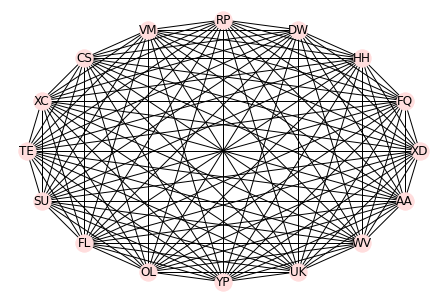

In [164]:
# we can calculate all possible path lengths between these valves
from itertools import combinations

W = nx.Graph()
for v0, v1 in combinations(closed_valves, 2):
    W.add_edge(v0, v1, weight=nx.shortest_path_length(G, v0, v1))

# add connection from AA as well
for v in closed_valves:
    W.add_edge('AA', v, weight=nx.shortest_path_length(G, 'AA', v))
    
nx_draw(W)

In [162]:
%%time

# reimplementing part 1 using recursion + caching (is this DP?)
# we go to and open each closed valve, picking the one that would give us the best score
import functools

@functools.lru_cache(maxsize=None)
def get_best_pressure(pos, time_left, closed_valves):
    # pick the best valve to open next
    best_pressure = 0
    for valve in closed_valves:
        # spend time moving to the valve and opening it
        remaining_time = time_left - W.get_edge_data(pos, valve)['weight'] - 1
        if remaining_time < 0:
            continue
        # get the pressure from open the valve for the remaining time
        this_pressure = valve_rates[valve] * remaining_time
        rest_pressure = get_best_pressure(valve, remaining_time, closed_valves-{valve})
        total_pressure = this_pressure + rest_pressure
        if total_pressure > best_pressure:
            best_pressure = total_pressure
    return best_pressure

get_best_pressure('AA', 30, frozenset(closed_valves))

CPU times: user 637 ms, sys: 8.9 ms, total: 646 ms
Wall time: 656 ms


2124

In [173]:
%%time
import functools
# now try to implement this with the elephant

@functools.lru_cache(maxsize=None)
def get_best_pressure(pos, time_left, closed, is_elephant):
    # pick the best valve to open next
    best_pressure = 0
    for valve in closed:
        # spend time moving to the valve and opening it
        remaining_time = time_left - W.get_edge_data(pos, valve)['weight'] - 1
        if remaining_time < 0:
            continue
        # get the pressure from open the valve for the remaining time
        this_pressure = valve_rates[valve] * remaining_time
        rest_pressure = get_best_pressure(valve, remaining_time, closed-{valve}, is_elephant)
        total_pressure = this_pressure + rest_pressure
        if total_pressure > best_pressure:
            best_pressure = total_pressure
    if is_elephant:
        return best_pressure
    else:
        # what's the best the elephant do with 26 minutes and all the remaining closed valves?
        # if it can beat what we can do then let it just do the rest
        elephant_pressure = get_best_pressure('AA', 26, closed, True)
        if elephant_pressure > best_pressure:
            return elephant_pressure
        else:
            return best_pressure

get_best_pressure('AA', 26, frozenset(closed_valves), False)

CPU times: user 22.7 s, sys: 1.04 s, total: 23.8 s
Wall time: 23.9 s


2775

## Day 17

Ugh, 2 hard problems on 2 consecutive days =_=

I didn't start today until 11pm.

Implementing Tetris was fine, but for part 2 I thought I could find a repeating pattern by searching for a loop at the start (rock index = 0, jet index = 0) instead of just any repeating pattern (rock index = X, jet index = Y). When that didn't work I got stumped. I was tired and cheated and peaked at another solution to get the insight that the repeating pattern doesn't have to start at index=0.

In [209]:
%%time
rock_data = '''####

.#.
###
.#.

..#
..#
###

#
#
#
#

##
##'''.split('\n\n')

# jets = '>>><<><>><<<>><>>><<<>>><<<><<<>><>><<>>'
jets = get_data(day=17)

# 01234567

# The tall, vertical chamber is exactly seven units wide. 
# Each rock appears so that its left edge is two units away 
# from the left wall and its bottom edge is three units above 
# the highest rock in the room (or the floor, if there isn't one).

class Rock(object):
    # y is the position of the floor or highest rock in the room
    def __init__(self, data, y):
        self.f = Field(data)
        # offset is the position of top-left pixel
        self.offset = (2, y - self.f.height - 2)
#         print('rock offset', self.offset)

    # return true if we didn't hit anything
    def move(self, direction, blocks):
        marker = Marker(self.offset)
        marker.move(direction)
        offx, offy = marker.pos
        # check that we haven't hit anything
        failed = False
        for (x, y), t in self.f.iterate():
            rx, ry = x + offx, y + offy
            if t == '#':
                # walls
                if rx < 0 or rx >= 7:
                    failed = True
                    break
                # floor
                if ry > 0:
                    failed = True
                    break
                if (rx, ry) in blocks:
                    failed = True
                    break
        if not failed:
            self.offset = marker.pos
        return not failed
    
    def get_xy_iter(self):
        offx, offy = self.offset
        for (x, y), t in self.f.iterate():
            if t == '#':
                yield (x + offx, y + offy)
        
def get_rock_data():
    i = 0
    while True:
        idx = i % len(rock_data)
        yield (rock_data[idx], idx)
        i += 1
        
def get_jet():
    i = 0
    j = list(jets)
    while True:
        idx = i % len(j)
        yield (j[idx], idx)
        i += 1

class Chamber(object):
    def __init__(self, rock_limit):
        self.rock_limit = rock_limit
        self.top = 0
        self.num_rocks_dropped = 0
        self.curr_rock = None
        self.blocks = set()
        self.rock_gen = get_rock_data()
        self.jet_gen = get_jet()
        # cache (rock_idx, jet_idx) => (num_rocks, height)
        self.heights = {}
        self.rock_idx = -1
        self.jet_idx = -1
#         self.rocks.append(Rock(next(self.rock_gen), self.top))
        
    def tick(self):
        jet, jet_idx = next(self.jet_gen)
        self.jet_idx = jet_idx
        if self.curr_rock is None:
            if self.num_rocks_dropped == self.rock_limit:
                return False
            new_rock, rock_idx = next(self.rock_gen)
            self.rock_idx = rock_idx
            self.curr_rock = Rock(new_rock, self.top)
        # move horiz
        if jet == '<':
            ok = self.curr_rock.move(Direction.W, self.blocks)
#             print('move left', ok)
        elif jet == '>':
            ok = self.curr_rock.move(Direction.E, self.blocks)
#             print('move right', ok)
        # move down
        if not self.curr_rock.move(Direction.S, self.blocks):
            # hit something
            for x, y in self.curr_rock.get_xy_iter():
                if y - 1 < self.top:
                    self.top = y - 1
#                     print('top is now', self.top)
                self.blocks.add((x, y))
            # check if we now have a new "floor", in which case we can ignore all the blocks below this
            ys = set([y for x, y in self.curr_rock.get_xy_iter()])
            for y in ys:
                if all([(x, y) in self.blocks for x in range(7)]):
#                     print('floor found @', y)
                    self.blocks = set(filter(lambda b: b[1] <= y, self.blocks))
                
            self.curr_rock = None
            self.num_rocks_dropped += 1
            
            # check cache
            key = (self.rock_idx, self.jet_idx)
            if key in self.heights and self.num_rocks_dropped > 0:
                cached_rocks_dropped, cached_height = self.heights[key]
                cycle = self.num_rocks_dropped - cached_rocks_dropped
                remaining_rocks = 1000000000000 - self.num_rocks_dropped
                if remaining_rocks % cycle == 0:
                    height_gained = self.height - cached_height
                    print('yohoho cycle found', key, cycle, height_gained)
                    total_height = self.height + remaining_rocks // cycle * height_gained
                    print('>>>>', total_height)
                    return False
            self.heights[key] = (self.num_rocks_dropped, self.height)
#         self.dump()
        return True
    
    def dump(self):
        if self.curr_rock:
            blocks = self.blocks.union(self.curr_rock.get_xy_iter())
        else:
            blocks = self.blocks
        print(blocks)
        
    def plot(self):
        if self.curr_rock:
            blocks = self.blocks.union(self.curr_rock.get_xy_iter())
        else:
            blocks = self.blocks
        plot_xy_list(blocks)
        
    @property
    def height(self):
        return -self.top

c = Chamber(2022)
while c.tick():
    pass
c.height

CPU times: user 217 ms, sys: 2.85 ms, total: 220 ms
Wall time: 221 ms


3130

In [210]:
%%time

c = Chamber(999999)
while c.tick():
    pass

yohoho cycle found (4, 9393) 1725 2685
>>>> 1556521739139
CPU times: user 328 ms, sys: 3.44 ms, total: 331 ms
Wall time: 341 ms


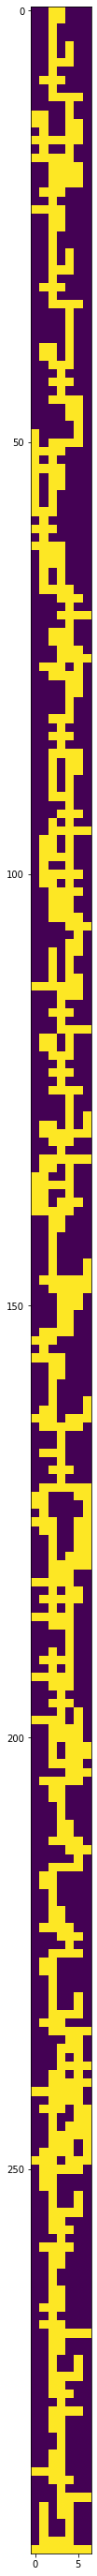

In [208]:
plt.figure(figsize = (50,50))
c.plot() # just shows the top of the tower as of latest "floor"

## Day 18

I left out the `abs(z0 - z1) == 1` condition for part 1 somehow. For part 2 I was very slow at writing the flood fill algorithm. I just don't enjoy crafting BFS algorithms by hand any more, but have just been too lazy to write an AOC library for it.

In [149]:
from aocd import lines
from itertools import combinations

def is_connected(a, b):
    x0, y0, z0 = a
    x1, y1, z1 = b
    if (x0 == x1 and y0 == y1 and abs(z0 - z1) == 1) or (x0 == x1 and z0 == z1 and abs(y0 - y1) == 1) or (z0 == z1 and y0 == y1 and abs(x0 - x1) == 1):
        return True
    return False

cubes = set()

for l in lines:
    x, y, z = map(int, l.split(','))
    cubes.add((x, y, z))

sides = 6 * len(cubes)
for c0, c1 in combinations(cubes, 2):
    if is_connected(c0, c1):
        sides -= 2
sides

3636

In [151]:
%%time
minx = min([x for x, y, z in cubes])
maxx = max([x for x, y, z in cubes])

miny = min([y for x, y, z in cubes])
maxy = max([y for x, y, z in cubes])

minz = min([z for x, y, z in cubes])
maxz = max([z for x, y, z in cubes])

def flood_fill(pt = (minx-1, miny-1, minz-1)):
    gas = set()
    surface = 0
    queue = [pt]
    while queue:
        x, y, z = queue.pop(0)
        if (x, y, z) in gas:
            continue
        gas.add((x, y, z))
        for ox, oy, oz in [(-1, 0, 0), (0, -1, 0), (0, 0, -1), (1, 0, 0), (0, 1, 0), (0, 0, 1)]:
            nx, ny, nz = x + ox, y + oy, z + oz
            if nx < minx-1 or ny < miny-1 or nz < minz-1 or nx > maxx+1 or ny > maxy+1 or nz > maxz+1:
                continue
            if (nx, ny, nz) in cubes:
                surface += 1 
            else:
                queue.append((nx, ny, nz))
    return surface
            
flood_fill()

CPU times: user 52.9 ms, sys: 2.44 ms, total: 55.3 ms
Wall time: 56.4 ms


2102

## Day 19

Out Christmas shopping, didn't start until late.

Seems like very similar problems this year and getting sick of them...

```
CPU times: user 39min 24s, sys: 7min 11s, total: 46min 35s
Wall time: 53min 9s
```

This is pretty bad, but not interested enough to try to optimise more.

Disappointed that `multiprocessing` doesn't work in jupyter.

In [211]:
!date

Mon Dec 19 17:46:38 AEDT 2022


In [23]:
%%time

from aocd import lines
import re
import functools
blueprints = []

TIME = 24
# TIME = 5

# lines = '''Blueprint 1: Each ore robot costs 4 ore. Each clay robot costs 2 ore. Each obsidian robot costs 3 ore and 14 clay. Each geode robot costs 2 ore and 7 obsidian.
# Blueprint 2: Each ore robot costs 2 ore. Each clay robot costs 3 ore. Each obsidian robot costs 3 ore and 8 clay. Each geode robot costs 3 ore and 12 obsidian.'''.split('\n')

for l in lines:
    blueprint_num, ore_cost, clay_cost, obs_ore, obs_clay, geo_ore, geo_obs = map(int, re.findall(r'\d+', l))
    blueprints.append((blueprint_num, ore_cost, clay_cost, obs_ore, obs_clay, geo_ore, geo_obs))
    
# minutes left, ore robots, clay robots, obs robots, geo robots, ore, clay, obs, geo
INITIAL = (TIME, 1, 0, 0, 0, 0, 0, 0, 0)

# each minute, robots will increase resource by 1
# each minute, factory can build 1 robot
@functools.lru_cache(maxsize=None)
def get_max_geo(blueprint, state=INITIAL):
    blueprint_num, ore_cost, clay_cost, obs_ore, obs_clay, geo_ore, geo_obs = blueprint
    time, robots_ore, robots_clay, robots_obs, robots_geo, ore, clay, obs, geo = state
#     print(time, robots_ore, robots_clay, robots_obs, robots_geo, ore, clay, obs, geo)
    if time == 1: # no point building a robot on the last turn
        return geo + robots_geo
    
    # optimise by seeing how many obsidian we can produce with the remaining time, and if we could possibly make 1 more geo bot
    max_obs = obs + robots_obs * time + sum(range(0, time - 2))
    if max_obs < geo_obs:
        return geo + robots_geo * time
        
    # always build a geo robot if possible
    if ore >= geo_ore and obs >= geo_obs:
        # always build geo if we can
        return get_max_geo(blueprint, (time-1, robots_ore, robots_clay, robots_obs, robots_geo + 1, ore + robots_ore - geo_ore, clay + robots_clay, obs + robots_obs - geo_obs, geo + robots_geo))
    
    possibilities = []
    # don't build anything
    possibilities.append(get_max_geo(blueprint, (time-1, robots_ore, robots_clay, robots_obs, robots_geo, ore + robots_ore, clay + robots_clay, obs + robots_obs, geo + robots_geo)))
    # build an ore robot
    if ore >= ore_cost:
        possibilities.append(get_max_geo(blueprint, (time-1, robots_ore + 1, robots_clay, robots_obs, robots_geo, ore + robots_ore - ore_cost, clay + robots_clay, obs + robots_obs, geo + robots_geo)))
    # build a clay robot
    if ore >= clay_cost:
        possibilities.append(get_max_geo(blueprint, (time-1, robots_ore, robots_clay + 1, robots_obs, robots_geo, ore + robots_ore - clay_cost, clay + robots_clay, obs + robots_obs, geo + robots_geo)))
    # build an obs robot
    if ore >= obs_ore and clay >= obs_clay:
        possibilities.append(get_max_geo(blueprint, (time-1, robots_ore, robots_clay, robots_obs + 1, robots_geo, ore + robots_ore - obs_ore, clay + robots_clay - obs_clay, obs + robots_obs, geo + robots_geo)))
    return max(possibilities)

score = 0
for bp in blueprints:
    geo = get_max_geo(bp)
    get_max_geo.cache_clear() # no point keeping the cache between blueprints
    print(bp[0], geo)
    score += bp[0] * geo
score

1 3
2 0
3 0
4 2
5 9
6 2
7 1
8 0
9 6
10 1
11 15
12 0
13 9
14 11
15 0
16 0
17 12
18 0
19 0
20 3
21 3
22 1
23 16
24 0
25 7
26 9
27 5
28 0
29 15
30 1
CPU times: user 7min 32s, sys: 14.8 s, total: 7min 47s
Wall time: 7min 58s


2301

In [25]:
%%time

from aocd import lines
import re
import functools
blueprints = []

TIME = 32
# TIME = 5

# lines = '''Blueprint 1: Each ore robot costs 4 ore. Each clay robot costs 2 ore. Each obsidian robot costs 3 ore and 14 clay. Each geode robot costs 2 ore and 7 obsidian.
# Blueprint 2: Each ore robot costs 2 ore. Each clay robot costs 3 ore. Each obsidian robot costs 3 ore and 8 clay. Each geode robot costs 3 ore and 12 obsidian.'''.split('\n')

for l in lines:
    blueprint_num, ore_cost, clay_cost, obs_ore, obs_clay, geo_ore, geo_obs = map(int, re.findall(r'\d+', l))
    blueprints.append((blueprint_num, ore_cost, clay_cost, obs_ore, obs_clay, geo_ore, geo_obs))
    
# minutes left, ore robots, clay robots, obs robots, geo robots, ore, clay, obs, geo
INITIAL = (TIME, 1, 0, 0, 0, 0, 0, 0, 0)

# each minute, robots will increase resource by 1
# each minute, factory can build 1 robot
@functools.lru_cache(maxsize=None)
def get_max_geo(blueprint, state=INITIAL):
    blueprint_num, ore_cost, clay_cost, obs_ore, obs_clay, geo_ore, geo_obs = blueprint
    time, robots_ore, robots_clay, robots_obs, robots_geo, ore, clay, obs, geo = state
#     print(time, robots_ore, robots_clay, robots_obs, robots_geo, ore, clay, obs, geo)
    if time == 1: # no point building a robot on the last turn
        return geo + robots_geo
    
    # optimise by seeing how many obsidian we can produce with the remaining time, and if we could possibly make 1 more geo bot
    max_obs = obs + robots_obs * time + sum(range(0, time - 2))
    if max_obs < geo_obs:
        return geo + robots_geo * time
        
    # always build a geo robot if possible
    if ore >= geo_ore and obs >= geo_obs:
        # always build geo if we can
        return get_max_geo(blueprint, (time-1, robots_ore, robots_clay, robots_obs, robots_geo + 1, ore + robots_ore - geo_ore, clay + robots_clay, obs + robots_obs - geo_obs, geo + robots_geo))
    
    possibilities = []
    # don't build anything
    possibilities.append(get_max_geo(blueprint, (time-1, robots_ore, robots_clay, robots_obs, robots_geo, ore + robots_ore, clay + robots_clay, obs + robots_obs, geo + robots_geo)))
    # build an ore robot
    if ore >= ore_cost:
        possibilities.append(get_max_geo(blueprint, (time-1, robots_ore + 1, robots_clay, robots_obs, robots_geo, ore + robots_ore - ore_cost, clay + robots_clay, obs + robots_obs, geo + robots_geo)))
    # build a clay robot
    if ore >= clay_cost:
        possibilities.append(get_max_geo(blueprint, (time-1, robots_ore, robots_clay + 1, robots_obs, robots_geo, ore + robots_ore - clay_cost, clay + robots_clay, obs + robots_obs, geo + robots_geo)))
    # build an obs robot
    if ore >= obs_ore and clay >= obs_clay:
        possibilities.append(get_max_geo(blueprint, (time-1, robots_ore, robots_clay, robots_obs + 1, robots_geo, ore + robots_ore - obs_ore, clay + robots_clay - obs_clay, obs + robots_obs, geo + robots_geo)))
    return max(possibilities)

get_max_geo.cache_clear()

score = 1
for bp in blueprints[:3]:
    geo = get_max_geo(bp)
    get_max_geo.cache_clear() # no point keeping the cache between blueprints
    print(bp[0], geo)
    score *= geo
score

1 38
2 16
3 17
CPU times: user 39min 24s, sys: 7min 11s, total: 46min 35s
Wall time: 53min 9s


10336

## Day 20

It took me over an hour to realise that the input numbers are not unique and just doing a `numbers.index(num)` was giving incorrect results. AGAIN the deceptive test data giving me the wrong idea, ugh!

In [148]:
from aocd import numbers

# since the numbers are not unique, we need to remember the original index to find them again
indexed_nums = [(i, n) for i, n in enumerate(numbers)]

for j, n in enumerate(numbers[:]):
    i = indexed_nums.index((j, n))
    idx = (n + i) % (len(numbers) - 1)
    if idx == 0:
        idx = len(numbers) - 1
    indexed_nums.pop(i)
    indexed_nums.insert(idx, (j, n))

idx = indexed_nums.index((3093, 0))
sum([indexed_nums[i % len(numbers)][1] for i in (idx + 1000, idx + 2000, idx + 3000)])

3346

In [155]:
from aocd import numbers

key = 811589153
numbers = [n * key for n in numbers]
zidx = numbers.index(0)

# since the numbers are not unique, we need to remember the original index to find them again
indexed_nums = [(i, n) for i, n in enumerate(numbers)]

for i in range(10):
    for j, n in enumerate(numbers[:]):
        i = indexed_nums.index((j, n))
        idx = (n + i) % (len(numbers) - 1)
        if idx == 0:
            idx = len(numbers) - 1
        indexed_nums.pop(i)
        indexed_nums.insert(idx, (j, n))

idx = indexed_nums.index((zidx, 0))
sum([indexed_nums[i % len(numbers)][1] for i in (idx + 1000, idx + 2000, idx + 3000)])

4265712588168

## Day 21

I guess it paid off that I learnt `z3` for Day 15 :)

In [230]:
# lazy ass eval() version for part 1

monkeys = {}
for l in lines:
    monkey, expr = l.split(': ')
    try:
        val = int(expr)
        monkeys[monkey] = val
    except:
        monkeys[monkey] = expr

def get_monkey(monkey):
    expr = monkeys[monkey]
    if isinstance(expr, int):
        return expr
    m1, op, m2 = expr.split(' ')
    s = f"{get_monkey(m1)} {op} {get_monkey(m2)}"
    return eval(s)

int(get_monkey('root'))

21208142603224

In [238]:
from z3 import Real, Solver # not sure if Real or Int
from aocd import lines

solver = Solver()
exprs = {}
variables = {}
values = {}
root0 = None
root1 = None

# create all the variables first
for l in lines:
    monkey, expr = l.split(': ')
    variables[monkey] = Real(monkey)
    if monkey == 'root':
        root0, op, root1 = expr.split(' ')
        continue
    if monkey == 'humn':
        continue
    try:
        values[monkey] = int(expr)
    except:
        exprs[monkey] = expr

# then add constraints by expressions
for monkey in exprs:
    expr = exprs[monkey]
    v = variables[monkey]
    m1, op, m2 = expr.split(' ')
    v1 = values[m1] if m1 in values else variables[m1]
    v2 = values[m2] if m2 in values else variables[m2]
    if op == '+':
        solver.add(v == v1 + v2)
    elif op == '*':
        solver.add(v == v1 * v2)
    elif op == '-':
        solver.add(v == v1 - v2)
    elif op == '/':
        solver.add(v == v1 / v2)
    else:
        raise RuntimeError(op)
        
# add the root condition        
solver.add(variables[root0] == variables[root1])
solver.check()
m = solver.model()
m[Real('humn')].as_long()

3882224466191

## Day 22

SO MANY BUGS. For part 1 I neglected the fact that the path string does not end with a `L/R` (my code somehow still worked for the test data, which again misled me into thinking my code was fine).

For part 2 I did a cut-out of the cube to manually translate edges but first I forgot that the direction also needs to be translated, and then I made an off-by-one mistake with some of the edges (I overlooked needing an extra -1 when inverting direction moving across edges). Took me ages to check and re-check the code.

INFO:aocd.get:most recent year=2022
INFO:root:Using default key_fn: {' ': 0, '#': 1, '.': 2}


109094

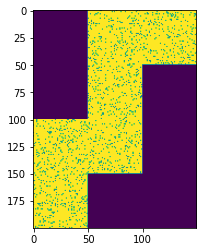

In [336]:
import re
from aocd import get_data
d = get_data(block=True, day=22)
# d = '''        ...#    
#         .#..    
#         #...    
#         ....    
# ...#.......#    
# ........#...    
# ..#....#....    
# ..........#.    
#         ...#....
#         .....#..
#         .#......
#         ......#.

# 10R5L5R10L4R5L5'''
raw, path = d.split('\n\n')
f = Field(raw)
f.plot()

m = Marker((len('                                                  '), 0), Direction.E)
for num, turn in re.findall(r'(\d+)(L|R)?', path):
    num = int(num)
    for _ in range(num):
        copy = Marker(m.pos, m.facing)
        copy.move()
        x, y = copy.pos
        t = f.get(*copy.pos, oob_none=True)
        if t == ' ' or t == None:
            # wrap around
            if copy.facing == Direction.E:
                x = 0
                while True:
                    t = f.get(x, y)
                    if t != ' ':
                        break
                    x += 1
            elif copy.facing == Direction.W:
                x = f.width - 1
                while True:
                    t = f.get(x, y)
                    if t != ' ':
                        break
                    x -= 1
            elif copy.facing == Direction.N:
                y = f.height - 1
                while True:
                    t = f.get(x, y)
                    if t != ' ':
                        break
                    y -= 1
            elif copy.facing == Direction.S:
                y = 0
                while True:
                    t = f.get(x, y)
                    if t != ' ':
                        break
                    y += 1
                    
        if t == '#':
            # wall, so don't move
            pass 
        else:
            m = Marker((x, y), m.facing)
    if turn == 'L':
        m.turn_left()
    elif turn == 'R':
        m.turn_right()
    
1000 * (m.pos[1] + 1) + 4 * (m.pos[0] + 1) + (m.facing - 1) % 4

In [338]:
import re
from aocd import get_data
d = get_data(block=True, day=22)
EDGE_SIZE = 50
raw, path = d.split('\n\n')
f = Field(raw)

m = Marker((len('                                                  '), 0), Direction.E)
for num, turn in re.findall(r'(\d+)(L|R)?', path):
    num = int(num)
    for _ in range(num):
        copy = Marker(m.pos, m.facing)
        copy.move()
        x, y = copy.pos
        facing = copy.facing
        t = f.get(*copy.pos, oob_none=True)
        if t == ' ' or t == None:
            # wrap around
            side_x, off_x = m.pos[0] // EDGE_SIZE, m.pos[0] % EDGE_SIZE
            side_y, off_y = m.pos[1] // EDGE_SIZE, m.pos[1] % EDGE_SIZE
            wx, wy, wf = None, None, None
            if copy.facing == Direction.N: #offx
                if side_x == 0:
                    wx, wy = 1 * EDGE_SIZE, 1 * EDGE_SIZE + off_x
                    wf = Direction.E
                elif side_x == 1:
                    wx, wy = 0, 3 * EDGE_SIZE + off_x
                    wf = Direction.E
                else: #2
                    wx, wy = off_x, 4 * EDGE_SIZE - 1
                    wf = Direction.N
            elif copy.facing == Direction.W: #offy
                if side_y == 0:
                    wx, wy = 0 * EDGE_SIZE, 2 * EDGE_SIZE + EDGE_SIZE - off_y - 1
                    wf = Direction.E
                elif side_y == 1:
                    wx, wy = off_y, 2 * EDGE_SIZE
                    wf = Direction.S
                elif side_y == 2:
                    wx, wy = 1 * EDGE_SIZE, 0 * EDGE_SIZE + EDGE_SIZE - off_y - 1
                    wf = Direction.E
                else:
                    wx, wy = 1 * EDGE_SIZE + off_y, 0 * EDGE_SIZE
                    wf = Direction.S
            elif copy.facing == Direction.E: #offy
                if side_y == 0:
                    wx, wy = 2 * EDGE_SIZE - 1, 2 * EDGE_SIZE + EDGE_SIZE - off_y - 1
                    wf = Direction.W
                elif side_y == 1:
                    wx, wy = 2 * EDGE_SIZE + off_y, 1 * EDGE_SIZE - 1
                    wf = Direction.N
                elif side_y == 2:
                    wx, wy = 3 * EDGE_SIZE - 1, EDGE_SIZE - off_y - 1
                    wf = Direction.W
                else:
                    wx, wy = 1 * EDGE_SIZE + off_y, 3 * EDGE_SIZE - 1
                    wf = Direction.N
            elif copy.facing == Direction.S: #offx
                if side_x == 0:
                    wx, wy = 2 * EDGE_SIZE + off_x, 0
                    wf = Direction.S
                elif side_x == 1:
                    wx, wy = EDGE_SIZE - 1, 3 * EDGE_SIZE + off_x
                    wf = Direction.W
                else:
                    wx, wy = 2 * EDGE_SIZE - 1, EDGE_SIZE + off_x
                    wf = Direction.W
            if wx is None or wy is None or wf is None:
                raise RuntimeError
            t = f.get(wx, wy)
            x, y, facing = wx, wy, wf
            
        if t == '#':
            # wall, so don't move
            pass 
        else:
            m = Marker((x, y), facing)
    if turn == 'L':
        m.turn_left()
    elif turn == 'R':
        m.turn_right()
    
1000 * (m.pos[1] + 1) + 4 * (m.pos[0] + 1) + (m.facing - 1) % 4

INFO:aocd.get:most recent year=2022


53324

## Day 23

For once, everything worked on first pass. Slowed down to print more debugging, which ended up being unnecessary.

INFO:aocd.get:most recent year=2022


3871

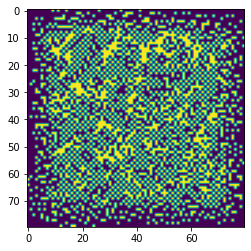

In [373]:
from aocd import get_data
from collections import Counter

d = get_data(block=True, day=23)
f = Field(d)
move_order = [
    { "consider": (Direction.N, Direction.NE, Direction.NW), "move": Direction.N },
    { "consider": (Direction.S, Direction.SE, Direction.SW), "move": Direction.S },
    { "consider": (Direction.W, Direction.NW, Direction.SW), "move": Direction.W },
    { "consider": (Direction.E, Direction.NE, Direction.SE), "move": Direction.E },
]
elves = set(f.find('#'))

def propose_move(elf, rnd):
    m = Marker(elf)
    found = False
    for x, y in m.adjdiag():
        if (x, y) in elves:
            found = True
            break
    if not found:
        # If no other Elves are in one of those eight positions, the Elf does not do anything during this round.
        return None
    
    for i in range(len(move_order)):
        ok = True
        moves = move_order[(rnd + i) % len(move_order)]
        pos = [m.relative_pos(d) for d in moves['consider']]
        for x, y in pos:
            if (x, y) in elves:
                ok = False
                break
        if ok:
            return m.relative_pos(moves['move'])        
    return None

rnd = 0
def tick():
    global rnd
    moved = 0
    # every elf proposes a move
    proposed = {}
    dests = Counter()
    for elf in elves:
        move = propose_move(elf, rnd)
        if move is not None:
            dests[move] += 1
            proposed[elf] = move
            
    # second half
    for elf in proposed:
        dst = proposed[elf]
        if dests[dst] == 1:
            elves.remove(elf)
            elves.add(dst)
            moved += 1
    rnd += 1
    return moved

for _ in range(10):
    tick()
plot_xy_list(elves)

coords = np.array(list(elves))
origin = np.min(coords, axis=0)
coords -= origin
grid = np.full(np.max(coords, axis=0) + 1, 0)
grid[tuple(coords.T)] = 1
np.size(grid) - np.count_nonzero(grid)

In [374]:
%%time
elves = set(f.find('#'))
rnd = 0
while (moved := tick()) > 0:
    if rnd % 100 == 0:
        print(rnd, moved)
    pass
rnd

100 877
200 1119
300 1265
400 1359
500 1190
600 916
700 611
800 328
900 42
CPU times: user 18.3 s, sys: 43.7 ms, total: 18.4 s
Wall time: 18.4 s


925

## Day 24

Christmas eve church service today, didn't start until half past midnight. Actual elapsed time was about 45 min for both parts.

I thought the search space would be very difficult and I'd have to look into A* searches, but it turned out a simple BFS was fine - though for some reason I forgot to include the `visited` check in my initial implementation.

In [442]:
%%time
data = get_data(day=24)

# data = '''#.#####
# #.....#
# #>....#
# #.....#
# #...v.#
# #.....#
# #####.#'''

# data = '''#.######
# #>>.<^<#
# #.<..<<#
# #>v.><>#
# #<^v^^>#
# ######.#'''

blizzard_key = "^>v<"

def move_blizzard(pos, d, f):
    m = Marker(pos, d)
    m.move()
    x, y = m.pos
    if x == 0:
        x = f.width - 2
    if x == f.width - 1:
        x = 1
    if y == 0:
        y = f.height - 2
    if y == f.height - 1:
        y = 1
    return x, y

class GameState(object):
    def __init__(self, raw):
        self.f = Field(raw)
        self.start = (1, 0)
        self.end = (self.f.width - 2, self.f.height - 1)
        assert self.f.get(*self.start) == '.'
        assert self.f.get(*self.end) == '.'
        self.walls = set(self.f.find('#'))
        self.blizzards_at_minute = [{}]
        self.minute = 0
        for d in range(4):
            self.blizzards_at_minute[0][d] = set(self.f.find(blizzard_key[d]))
            
    def move_blizzards(self):
        self.blizzards_at_minute.append({})
        for d in range(4):
            new_set = set()
            for b in self.blizzards_at_minute[self.minute][d]:
                new_set.add(move_blizzard(b, d, self.f))
            self.blizzards_at_minute[self.minute + 1][d] = new_set
        self.minute += 1
            
    def plot(self, minute):
        bliz = set()
        for d in range(4):
            bliz = bliz.union(self.blizzards_at_minute[minute][d])
        print(bliz)
        plot_xy_list(bliz)
        
    def can_move(self, pos, minute):
        x, y = pos
        if pos == self.end or pos == self.start:
            return True
        if x <= 0 or x >= self.f.width - 1 or y <= 0 or y >= self.f.height - 1:
            return False
        while minute >= self.minute:
            self.move_blizzards()
        for d in range(4):
            if pos in self.blizzards_at_minute[minute][d]:
                return False
        return True
        
    def find_path(self, src, dest, start_min = 0):
        # position, minute
        queue = [(src, start_min)]
        visited = set()
        while queue:
            state = queue.pop(0)
            if state in visited:
                continue
            visited.add(state)
            pos, minute = state
            if pos == dest:
                return minute
            next_min = minute + 1
            m = Marker(pos)
            for apos in m.adjacent():
                if self.can_move(apos, next_min):
                    queue.append((apos, next_min))
            if self.can_move(pos, next_min):
                queue.append((pos, next_min)) # stay in place
            
g = GameState(data)
g.find_path(g.start, g.end)

INFO:aocd.get:most recent year=2022


CPU times: user 2.83 s, sys: 18.1 ms, total: 2.85 s
Wall time: 2.87 s


292

In [443]:
%%time
t1 = g.find_path(g.start, g.end)
t2 = g.find_path(g.end, g.start, t1)
g.find_path(g.start, g.end, t2)

CPU times: user 6.35 s, sys: 51.2 ms, total: 6.4 s
Wall time: 6.42 s


816

## Day 25

I got stumped by `int2snafu` for WAAAY too long. Not sure why I didn't think of using recursion at all and tried to do fancy math, which I am definitely not fancy in.

Merry Christmas everyone :D

In [512]:
from aocd import lines

key = '=-012'
def snafu2int(s):
    place = 1
    num = 0
    for c in s[::-1]:
        n = key.index(c) - 2
        num += n * place
        place *= 5
    return num

nn = sum([snafu2int(n) for n in lines])

def int2snafu(n):
    x = n
    if n == 0:
        return ''
    digits = []
    num = (x + 2) // 5
    rem = ((x + 2) % 5) - 2
    digit = key[(rem + 2) % len(key)]
    return int2snafu(num) + digit

int2snafu(nn)

'2=-0=01----22-0-1-10'

### Common utilities and imports

Copied from 2021

In [242]:
import requests
import logging
import re
from functools import lru_cache
from itertools import permutations, combinations, chain, cycle, product, islice
import networkx as nx
import collections
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import copy
import os
from aocd import get_data, submit

logger = logging.getLogger()
logger.setLevel(level=logging.INFO)

def get_ready():
    d = get_data(block=True)
    print(d)
    return d
        
## general utils
# a default dict that passes the key to the default_factory
class keydefaultdict(collections.defaultdict):
    def __missing__(self, key):
        if self.default_factory is None:
            raise KeyError(key)
        else:
            ret = self[key] = self.default_factory(key)
            return ret

## plotting tools
# plot an iterable of (x, y)
def plot_xy_list(it, lowerLeft=None, upperRight=None):
    coords = np.array(list(it))
    origin = np.min(coords, axis=0)
    coords -= origin
    grid = np.full(np.max(coords, axis=0) + 1, 0)
    grid[tuple(coords.T)] = 1
    return plt.imshow(grid.T)

## XXX THIS DOESN'T WORK
def plot_xy_list_with_bounds(it, lowerLeft=None, upperRight=None):
    coords = np.array(list(it))
    origin = lowerLeft if lowerLeft else np.min(coords, axis=0)
    dimensions = upperRight if upperRight else np.max(coords, axis=0) + 1
    coords -= origin
    grid = np.full(dimensions, 0)
    inidx = np.all(np.logical_and(origin <= coords, coords < dimensions), axis = 0)
    inbox = coords[inidx]
    grid[tuple(inbox.T)] = 1
    return plt.imshow(grid.T)

def plot_xy_list_ascii(it):
    coords = np.array(list(it))
    origin = np.min(coords, axis=0)
    coords -= origin
    grid = np.full(np.max(coords, axis=0) + 1, 0)
    grid[tuple(coords.T)] = 1
    return grid
    
def nx_draw(G):
    layout = nx.circular_layout(G)
    nx.draw(G, pos=layout, with_labels=True, node_color='#ffdddd')
    plt.show()

class Direction(object):
    N = U = 0
    E = R = 1
    S = D = 2
    W = L = 3
    NE = 4
    SE = 5
    SW = 6
    NW = 7
    DIRS = [
        (0, -1),
        (1, 0),
        (0, 1),
        (-1, 0),
        (1, -1),
        (1, 1),
        (-1, 1),
        (-1, -1)
    ]
    @staticmethod
    def from_string(s):
        try:
            return ['N', 'E', 'S', 'W', 'NE', 'SE', 'SW', 'NW'].index(s)
        except ValueError:
            return ['U', 'R', 'D', 'L'].index(s)
    
class Marker(object):
    def __init__(self, pos, facing=Direction.N):
        self.pos = pos
        self.facing = facing
    def relative_pos(self, direction, units=1):
        delta = Direction.DIRS[direction]
        return (self.pos[0] + delta[0] * units, self.pos[1] + delta[1] * units)
    def move(self, direction=None, units=1):
        if direction is None:
            direction = self.facing
        self.pos = self.relative_pos(direction, units)
        return self.pos
    def turn_left(self):
        self.facing -= 1
        self.facing %= 4
    def turn_right(self):
        self.facing += 1
        self.facing %= 4
    def adjacent(self):
        return [self.relative_pos(d) for d in range(4)]
    def adjdiag(self):
        for dx, dy in Direction.DIRS:
            yield (self.pos[0] + dx, self.pos[1] + dy)
    def is_inside(self, field):
        x, y = self.pos
        return x >= 0 and x < field.width and y >= 0 and y < field.height
    def diff(self, marker):
        return (self.pos[0] - marker.pos[0], self.pos[1] - marker.pos[1])
    
class Field(object):
    def __init__(self, data, force_width=None):
        try:
            self.field = data.split('\n')
        except:
            self.field = data.decode('ascii').split('\n')
        if force_width:
            self.width = force_width
        else:
            self.width = len(self.field[0])        
        self.field = [ r + ' ' * (self.width - len(r)) for r in self.field ]
        self.field = [ list(r) for r in self.field ]
        self.height = len(self.field)
        self.markers = []
        
    def clone(self):
        f = Field('')
        f.field = copy.deepcopy(self.field)
        f.width = self.width
        f.height = self.height
        # TODO markers
        return f
    
    def dump(self):
        print(self.raw)
    
    @staticmethod
    def from_day(day):
        return Field(get_input(day))
    
    @staticmethod
    def from_numpy(arr):
        f = Field('')
        f.field = arr.tolist()
        f.width = len(f.field[0])
        f.height = len(f.field)
        return f
    
    @property
    def raw(self):
        return '\n'.join(''.join([str(c) for c in r]) for r in self.field)
        
    def add_marker(self, marker):
        self.markers.append(marker)
        
    def get(self, x, y, oob_none=False):
        if x < 0 or y < 0 or x >= self.width or y >= self.height:
            if oob_none:
                return None
            raise KeyError('(%d:%d): out of bounds! [%dx%d]' % (x, y, self.width, self.height))
        return self.field[y][x]
    
    def set(self, x, y, v):
        self.field[y][x] = v
    
    def find(self, v):
        for y in range(self.height):
            for x in range(self.width):
                if self.get(x, y) == v:
                    yield (x, y)

    def iterate(self):
        for y in range(self.height):
            for x in range(self.width):
                yield (x, y), self.get(x, y)
                
    def iterate_marker(self):
        for y in range(self.height):
            for x in range(self.width):
                yield Marker((x, y))
                                
    @property
    def numpy(self):
        return np.array(self.field)
    
    @property
    def df(self):
        return pd.DataFrame(self.numpy)
    
    def map(self, fn):
        clone = self.clone()
        for (x, y), v in clone.iterate():
            clone.set(x, y, fn(v))
        return clone
    
    def plot(self, key_fn=None):        
        if key_fn is None:
            mapping = { v: i for (i, v) in enumerate(np.unique(self.numpy)) }
            key_fn = lambda x: mapping[x]
            logging.info('Using default key_fn: %s', mapping)
        mapped = np.vectorize(key_fn)(self.numpy)
        if len(self.markers) > 0:
            marker_key = np.max(mapped) + 1
            for m in self.markers:
                mapped[m.pos[1]][m.pos[0]] = marker_key
                marker_key += 1            
        plt.imshow(mapped)
        
    def nx_maze(self, is_wall_fn=lambda t, pos: t == '#'):
        G = nx.grid_2d_graph(f.width, f.height)
        for pos, t in self.iterate():
            if is_wall_fn(t, pos):
                G.remove_node(pos)
        return G
    
# consider implementing a generalised dijkstras algorithm where you only need to implement
# (i) a State object that is hashable
# (ii) a get_next_states(priority, state) function that returns another list of (priority, state)
# (iii) a is_solved(state) function that returns boolean
# and run with solve(initial_state) to return lowest 
from queue import PriorityQueue
from dataclasses import dataclass, field as dcfield
from typing import Any, Callable, Generator

@dataclass(order=True)
class PrioritizedState:
    distance: int
    state: Any=dcfield(compare=False)
    def __hash__(self):
        return hash(self.state)
    def __eq__(self, other):
        return self.state == other.state

def dijkstra(initial_state: PrioritizedState, 
             get_next: Callable[[PrioritizedState], Generator[PrioritizedState, None, None]], 
             is_solved: Callable[[PrioritizedState], bool]) -> Generator[PrioritizedState, None, None]:
    queue = PriorityQueue()
    visited = set()
    queue.put(PrioritizedState(0, initial_state))
    
    while True:
        if queue.empty():
            logging.warning('no more states to try')
            break
        ps = queue.get()
        if ps in visited:
            continue
        visited.add(ps)
        if is_solved(ps):
            logging.info('solution found after visitng %d', len(visited))
            yield ps
        for ns in get_next(ps):
            queue.put(ns)